# Определение тарифа для телеком компании

**Описание проекта**

Клиентам федерального оператора сотовой связи «Мегалайн» предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, необходимо определить, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

**Тариф «Смарт»**

* Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
  * минута разговора: 3 рубля
  * сообщение: 3 рубля
  * 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**

* Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета:
   * минута разговора: 1 рубль
   * сообщение: 1 рубль
   * 1 Гб интернет-трафика: 150 рублей


*Примечание*:

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.
Инструкция по выполнению проекта

**Шаг 1. Открыть файл с данными и изучить общую информацию**

Путь к файлам:
- /datasets/calls.csv.

- /datasets/internet.csv. 

- /datasets/messages.csv. 

- /datasets/tariffs.csv. 

- /datasets/users.csv. 


**Шаг 2. Подготовить данные**

* Привести данные к нужным типам;
* Найти и исправьте ошибки в данных, если они есть.
* Пояснить, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.
* Посчитать для каждого пользователя:
  - количество сделанных звонков и израсходованных минут разговора по месяцам;
  - количество отправленных сообщений по месяцам;
  - объем израсходованного интернет-трафика по месяцам;
  - помесячную выручку с каждого пользователя.

**Шаг 3. Проанализировать данные**

* Описать поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
* Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

**Шаг 4. Проверить гипотезы:**

* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.
* Пояснить:
  - как формулировали нулевую и альтернативную гипотезы;
  - какой критерий использовали для проверки гипотез и почему.

**Шаг 5. Написать общий вывод**


## Шаг 1. Изучение общей информации

Изучим данные, для этого сначала импортируем библиотеку, прочитаем таблицы и сохраним их в соответствующих переменных users, calls, messages, internet и tariffs.

In [1]:
import pandas as pd # импорт библиотек
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats as st

In [2]:
users = pd.read_csv(
    '/datasets/users.csv')

calls = pd.read_csv(
    '/datasets/calls.csv')
     
messages = pd.read_csv(
    '/datasets/messages.csv') 

internet = pd.read_csv(
    '/datasets/internet.csv')

tariffs = pd.read_csv(
    '/datasets/tariffs.csv')

### Таблица users (информация о пользователях)

Для ознакомления выводим первые 5 строк и информацию о таблице.

In [3]:
users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблице восемь столбцов. Тип данных во 2 столбцах - int64, в 6 столбцах - object.

Согласно документации к данным:

* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tarif — название тарифного плана

### Таблица calls (информация о звонках)

Аналогично выводим первые 5 строк и информацию о таблице.

In [5]:
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице восемь столбцов. Тип данных в 2 столбцах - object и по одному - int64 и float64.

Согласно документации к данным:

* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

### Таблица messages (информация о сообщениях)

Также выводим первые 5 строк и информацию о таблице

In [7]:
messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице три столбца. Тип данных в 2 столбцах - object и один - int64.

Согласно документации к данным:

* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

### Таблица internet (информация об интернет-сессиях)

Выводим первые 5 строк и информацию о таблице.

In [9]:
internet.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В таблице пять столбцов. Тип данных в 2 столбцах - object, в других 2 - int64 и в одном - float64.

Согласно документации к данным:

* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

###  Таблица tariffs (информация о тарифах)

И выводим первые 5 строк и информацию о последней таблице.

In [11]:
tariffs.head(5)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице восемь столбцов. Тип данных в 7 столбцах - int64 и в одном - object.

Согласно документации к данным:

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

**Вывод**

Работа предстоит с пятью таблицами. В users, calls, messages, internet в столбцах, связанных с датами, необходимо поменять тип данных. Пропущенные значения есть только в таблице users в столбце churn_date (дата прекращения пользования тарифом), то есть попуски намеренные, и мы можем отличить действующих пользователей от ушедших.

## Шаг 2. Подготовка данных

В следующем разделе мы приведем данные к нужному типу и исправим ошибки, если они есть.

### Таблица users

методом to_datetime() превратим содержимое столбцов reg_date в понятные для Python даты.

In [13]:
users['reg_date'] = pd.to_datetime(
    users['reg_date'], format='%Y-%m-%d'
)
users.info() #проверяем

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


Далее добавим столбец с месяцем подключения тарифа, он понадобится для дальнейших исследований.

In [14]:
users['reg_month'] = users['reg_date'].dt.month
users.head(5) #выведим первые 5 строк для проверки

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5


In [15]:
users.duplicated().sum() #проверим количество явных дубликатов

0

Далее мы проверили каждой столбец на неявные дубликаты, некоторые с сортировкой, чтоб легче было увидеть ошибки, если они есть.

In [16]:
users['user_id'].unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120,
       1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131,
       1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142,
       1143, 1144, 1145, 1146, 1147, 1148, 1149, 11

In [17]:
users['age'].value_counts()

53    14
42    14
63    13
64    13
71    13
21    12
40    12
73    12
29    11
39    11
37    11
47    11
26    11
41    10
45    10
58    10
36    10
70    10
52    10
65     9
66     9
56     9
68     9
20     9
51     9
50     9
48     9
30     9
19     9
24     9
28     9
27     9
23     9
62     8
60     8
55     8
69     8
44     8
25     7
31     7
35     7
67     7
74     7
43     7
32     7
46     7
18     6
59     6
54     6
75     6
38     5
34     5
72     5
33     5
22     5
57     4
49     4
61     3
Name: age, dtype: int64

Удивительно, что в тройку лидеров численности по возрастам пользователей входят 71-летние (13 человек).

In [18]:
sorted(users['city'].unique())

['Архангельск',
 'Астрахань',
 'Балашиха',
 'Барнаул',
 'Белгород',
 'Брянск',
 'Владивосток',
 'Владикавказ',
 'Владимир',
 'Волгоград',
 'Волжский',
 'Вологда',
 'Воронеж',
 'Грозный',
 'Екатеринбург',
 'Иваново',
 'Ижевск',
 'Иркутск',
 'Казань',
 'Калининград',
 'Калуга',
 'Кемерово',
 'Киров',
 'Кострома',
 'Краснодар',
 'Красноярск',
 'Курган',
 'Курск',
 'Липецк',
 'Магнитогорск',
 'Махачкала',
 'Москва',
 'Мурманск',
 'Набережные Челны',
 'Нижневартовск',
 'Нижний Новгород',
 'Нижний Тагил',
 'Новокузнецк',
 'Новороссийск',
 'Новосибирск',
 'Омск',
 'Оренбург',
 'Орёл',
 'Пенза',
 'Пермь',
 'Петрозаводск',
 'Подольск',
 'Ростов-на-Дону',
 'Рязань',
 'Самара',
 'Санкт-Петербург',
 'Саранск',
 'Саратов',
 'Севастополь',
 'Смоленск',
 'Сочи',
 'Ставрополь',
 'Стерлитамак',
 'Сургут',
 'Тамбов',
 'Тверь',
 'Тольятти',
 'Томск',
 'Тула',
 'Тюмень',
 'Улан-Удэ',
 'Ульяновск',
 'Уфа',
 'Хабаровск',
 'Химки',
 'Чебоксары',
 'Челябинск',
 'Череповец',
 'Чита',
 'Якутск',
 'Ярославль']

Странных названий городов, опечаток замечено не было.

In [19]:
users['city'].value_counts()

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Иваново             1
Архангельск         1
Подольск            1
Химки               1
Нижневартовск       1
Name: city, Length: 76, dtype: int64

Москве конечно же больше всего пользователей, что не удивительно.

Рассматриавть столбцы с именами, фамилиями смысла нет, на исследование эти данные не повлияют.

In [20]:
sorted(users['reg_date'].unique())

[numpy.datetime64('2018-01-01T00:00:00.000000000'),
 numpy.datetime64('2018-01-02T00:00:00.000000000'),
 numpy.datetime64('2018-01-04T00:00:00.000000000'),
 numpy.datetime64('2018-01-05T00:00:00.000000000'),
 numpy.datetime64('2018-01-06T00:00:00.000000000'),
 numpy.datetime64('2018-01-08T00:00:00.000000000'),
 numpy.datetime64('2018-01-09T00:00:00.000000000'),
 numpy.datetime64('2018-01-12T00:00:00.000000000'),
 numpy.datetime64('2018-01-13T00:00:00.000000000'),
 numpy.datetime64('2018-01-15T00:00:00.000000000'),
 numpy.datetime64('2018-01-16T00:00:00.000000000'),
 numpy.datetime64('2018-01-17T00:00:00.000000000'),
 numpy.datetime64('2018-01-18T00:00:00.000000000'),
 numpy.datetime64('2018-01-19T00:00:00.000000000'),
 numpy.datetime64('2018-01-20T00:00:00.000000000'),
 numpy.datetime64('2018-01-21T00:00:00.000000000'),
 numpy.datetime64('2018-01-23T00:00:00.000000000'),
 numpy.datetime64('2018-01-24T00:00:00.000000000'),
 numpy.datetime64('2018-01-25T00:00:00.000000000'),
 numpy.datet

Му убедились, что данные предоставлены за 1 год, 2019 и другие здесь не затерялись.

In [21]:
users['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

Тарифа только два, как и должно быть.

In [22]:
users['reg_month'].value_counts()

4     53
8     50
10    45
7     44
1     43
11    42
5     41
6     40
2     39
12    36
9     35
3     32
Name: reg_month, dtype: int64

Рассмотрели и созданный нами столбец, сразу можно заметить, что в апреле больше всего людей подключились к тарифу, а в марте - меньше всего.

### Таблица calls

In [23]:
calls.duplicated().sum() #проверим количество явных дубликатов

0

Дубликатов нет, далее проверим даты звонков. Для этого сначала методом to_datetime() превратим содержимое столбцов call_date в понятные для Python даты.

In [24]:
calls['call_date'] = pd.to_datetime(
    calls['call_date'], format='%Y-%m-%d'
)

In [25]:
sorted(calls['call_date'].unique())

[numpy.datetime64('2018-01-01T00:00:00.000000000'),
 numpy.datetime64('2018-01-02T00:00:00.000000000'),
 numpy.datetime64('2018-01-03T00:00:00.000000000'),
 numpy.datetime64('2018-01-04T00:00:00.000000000'),
 numpy.datetime64('2018-01-05T00:00:00.000000000'),
 numpy.datetime64('2018-01-06T00:00:00.000000000'),
 numpy.datetime64('2018-01-07T00:00:00.000000000'),
 numpy.datetime64('2018-01-08T00:00:00.000000000'),
 numpy.datetime64('2018-01-09T00:00:00.000000000'),
 numpy.datetime64('2018-01-10T00:00:00.000000000'),
 numpy.datetime64('2018-01-11T00:00:00.000000000'),
 numpy.datetime64('2018-01-12T00:00:00.000000000'),
 numpy.datetime64('2018-01-13T00:00:00.000000000'),
 numpy.datetime64('2018-01-14T00:00:00.000000000'),
 numpy.datetime64('2018-01-15T00:00:00.000000000'),
 numpy.datetime64('2018-01-16T00:00:00.000000000'),
 numpy.datetime64('2018-01-17T00:00:00.000000000'),
 numpy.datetime64('2018-01-18T00:00:00.000000000'),
 numpy.datetime64('2018-01-19T00:00:00.000000000'),
 numpy.datet

За другие года даты не встречаются, люди звонят с 1 января по 31 декабря.

In [26]:
calls['user_id'].unique()

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054,
       1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065,
       1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076,
       1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087,
       1088, 1089, 1090, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099,
       1100, 1101, 1102, 1103, 1104, 1105, 1107, 1108, 1109, 1110, 1111,
       1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122,
       1123, 1124, 1125, 1126, 1127, 1129, 1130, 1131, 1132, 1133, 1134,
       1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145,
       1146, 1147, 1148, 1149, 1150, 1151, 1152, 11

Проверили столбец user_id, все в порядке.

Далее добавим дополнительный столбец- месяц звонка(call_month), он понадобится для дальнейших расчетов.

In [27]:
calls['month'] = calls['call_date'].dt.month
calls.head(5) #проверим

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


А также сразу создадим столбец round_duration, где будут значения столбца duration, округленные в большую сторону. 

In [28]:
calls['round_duration'] = np.ceil(calls['duration']).astype(int)
calls.head(5) #проверим

,id,call_date,duration,user_id,month,round_duration
0,1000_0,2018-07-25,0.00,1000,7,0
1,1000_1,2018-08-17,0.00,1000,8,0
2,1000_2,2018-06-11,2.85,1000,6,3
3,1000_3,2018-09-21,13.80,1000,9,14
4,1000_4,2018-12-15,5.18,1000,12,6


In [29]:
calls['month'].value_counts()

12    33987
11    29501
10    27146
9     24061
8     21488
7     18298
6     14716
5     12647
4      9272
3      6687
2      3328
1      1476
Name: month, dtype: int64

Можно обратить внимание, что с января каждый следующий месяц звонков становится значительно больше и пик приходит на декабрь. На данный момент тяжело сказать с чем это связано, люди правда начинают все больше звонить, или люди начали все чаще делать дозвоны, а может упало качество связи и нужно несколько попыток, чтоб дозвониться. Но мы точно знаем из предыдущей таблицы, что помесячная динамика подключения новых клиентов совсем другая, то есть увеличение звонков из месяца в месяц никак не связано с увеличением клиентов.

In [30]:
calls['round_duration'].value_counts()

0     39613
7     11510
6     11457
5     11411
8     11272
9     10973
4     10918
3     10362
10    10186
11     9385
2      9194
12     8448
1      8402
13     7486
14     6554
15     5505
16     4551
17     3671
18     2984
19     2411
20     1806
21     1304
22      975
23      720
24      468
25      363
26      257
27      151
28      104
29       56
30       39
31       30
32       17
33       10
35        5
34        3
36        2
37        2
38        2
Name: round_duration, dtype: int64

Отметим, что больше всего в таблице пропущенных звонков - 39 613 шт, а звонков, длящихся больше 34 минут очень мало, уже видно, что они выбиваются.

### Таблица messages

Проверим количество явных дубликатов.

In [31]:
messages.duplicated().sum() #узнаем количество явных дубликатов

0

Аналогично методом to_datetime() превратим содержимое столбцов message_date в понятные для Python даты.

In [32]:
messages['message_date'] = pd.to_datetime(
    messages['message_date'], format='%Y-%m-%d'
)
messages.info() #проверим

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [33]:
sorted(messages['message_date'].unique())

[numpy.datetime64('2018-01-02T00:00:00.000000000'),
 numpy.datetime64('2018-01-03T00:00:00.000000000'),
 numpy.datetime64('2018-01-04T00:00:00.000000000'),
 numpy.datetime64('2018-01-05T00:00:00.000000000'),
 numpy.datetime64('2018-01-06T00:00:00.000000000'),
 numpy.datetime64('2018-01-07T00:00:00.000000000'),
 numpy.datetime64('2018-01-08T00:00:00.000000000'),
 numpy.datetime64('2018-01-09T00:00:00.000000000'),
 numpy.datetime64('2018-01-10T00:00:00.000000000'),
 numpy.datetime64('2018-01-11T00:00:00.000000000'),
 numpy.datetime64('2018-01-12T00:00:00.000000000'),
 numpy.datetime64('2018-01-13T00:00:00.000000000'),
 numpy.datetime64('2018-01-14T00:00:00.000000000'),
 numpy.datetime64('2018-01-15T00:00:00.000000000'),
 numpy.datetime64('2018-01-16T00:00:00.000000000'),
 numpy.datetime64('2018-01-17T00:00:00.000000000'),
 numpy.datetime64('2018-01-18T00:00:00.000000000'),
 numpy.datetime64('2018-01-19T00:00:00.000000000'),
 numpy.datetime64('2018-01-20T00:00:00.000000000'),
 numpy.datet

Все ок, добавим столбец message_month.

In [34]:
messages['month'] = messages['message_date'].dt.month
messages['month'] .value_counts()

12    20555
11    18244
10    17114
9     14759
8     13088
7     11320
6      8983
5      7298
4      5179
3      3648
2      1924
1       924
Name: month, dtype: int64

Ситуция аналогична со звонками, количество смс значительно растет каждый последующий месяц, начиная с января 924 и заканчивая декабрем - 20 555.

### Таблица internet

In [35]:
internet.duplicated().sum() #проверим количество явных дубликатов

0

Удалим случайный столбец Unnamed: 0, которого нет в документации, и поменяем тип данных в столбце session_date.

In [36]:
internet = internet.drop('Unnamed: 0', 1) #удалим случайный столбец
internet['session_date'] = pd.to_datetime(
    internet['session_date'], format='%Y-%m-%d'
)

Уберем интернет-сессии, не затрачившие ни одного мегабайта трафика:

In [37]:
internet = internet.query('mb_used != 0.0')
len(internet)

129798

Количество строк уменьшилось почти на 20 тыс, то есть на 13%.

Добавим столбец session_month для последующих расчетов.

In [38]:
internet['month'] = internet['session_date'].dt.month
internet['month'] .value_counts()

12    21478
11    18910
10    17367
9     15198
8     14009
7     11788
6      9656
5      8209
4      5692
3      4262
2      2263
1       966
Name: month, dtype: int64

Также как со звонками и сообщениями, к интернету с каждым месяцем люди подключаются чаще, но сюда входят и сессии с нулевым трафиком.

In [39]:
internet['session_date'].value_counts()

2018-12-31    916
2018-12-30    778
2018-12-26    752
2018-12-25    747
2018-12-24    728
             ... 
2018-01-05     13
2018-01-04      6
2018-01-03      5
2018-01-01      2
2018-01-02      2
Name: session_date, Length: 365, dtype: int64

Я решила проверить также столбец с датой, здесь тоже можно заметить, что 1-2 января меньше всего подключений, а 31го декабря больше всего.

 ### Таблица tariffs

ДЛя облегчения последующих расчетов мы добавим мы переведем столбец с мегабайтами в гигабайты и создадим новый столбец - gb_per_month_included.

In [40]:
tariffs['gb_per_month_included'] = tariffs['mb_per_month_included']/1024
tariffs #проверим

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


### Подготовка пользовательских данных

Нам нужно посчитать для каждого пользователя:
* количество сделанных звонков и израсходованных минут разговора по месяцам; 
* количество отправленных сообщений по месяцам; 
* объем израсходованного интернет-трафика по месяцам;
* помесячную выручку с каждого пользователя

Создадим таблицу calls_grouped, сгруппировав данные по каждому пользователю с расчетом количества звонков и их продолжительность в месяц.

In [41]:
calls_grouped = calls.groupby(['user_id','month'] ).agg({'round_duration': ['count', 'sum']}) #создаем таблицу
calls_grouped.columns = ['calls_count', 'duration_sum'] #переименовываем столбцы
calls_grouped #проверяем

calls_count  duration_sum
user_id month                           
1000    5               22           159
        6               43           172
        7               47           340
        8               52           408
        9               58           466
...                    ...           ...
1498    10              41           247
1499    9                9            70
        10              68           449
        11              74           612
        12              69           492

[3174 rows x 2 columns]

Аналогично создадим таблицу messages_grouped с расчетом количества сообщений:

In [42]:
messages_grouped = messages.groupby(['user_id','month'] ).agg({'id': ['count']}) #создаем таблицу
messages_grouped.columns = ['sms_count'] #переименовываем столбец
messages_grouped #проверяем

sms_count
user_id month           
1000    5             22
        6             60
        7             75
        8             81
        9             57
...                  ...
1498    10            42
1499    9             11
        10            48
        11            59
        12            66

[2717 rows x 1 columns]

И такую же таблицу для расчета использованного объема интернета каждым пользователем в месяц:

In [43]:
internet_grouped = internet.groupby(['user_id','month'] ).agg({'mb_used': ['sum']}) #создаем таблицу
internet_grouped.columns = ['sum_mb_used'] #переименовываем столбец
internet_grouped #выводим

sum_mb_used
user_id month             
1000    5          2253.49
        6         23233.77
        7         14003.64
        8         14055.93
        9         14568.91
...                    ...
1498    10        20579.36
1499    9          1845.75
        10        17788.51
        11        17963.31
        12        13055.58

[3201 rows x 1 columns]

Теперь переведем мегабайты в гигабайты и округлим в большую сторону, чтобы значение было кратно 1 ГБ.

In [44]:
internet_grouped['sum_gb_used'] = np.ceil(internet_grouped['sum_mb_used']/1024).astype(int)
internet_grouped.head(5) #проверяем

sum_mb_used  sum_gb_used
user_id month                          
1000    5          2253.49            3
        6         23233.77           23
        7         14003.64           14
        8         14055.93           14
        9         14568.91           15

Далее мы соединим все полученные таблицы: calls_grouped, messages_grouped, internet_grouped и user - в одну data. Используем атрибут how='outer', чтобы никакие данные не потерялись.

In [45]:
data = calls_grouped.merge(messages_grouped, on=['user_id', 'month'], how='outer').reset_index()
data = data.merge(internet_grouped, on=['user_id', 'month'], how='outer')
data = data.merge(users[['user_id', 'tariff', 'city']], on=['user_id'], how='left')

data #выводим на экран

,user_id,month,calls_count,duration_sum,sms_count,sum_mb_used,sum_gb_used,tariff,city
0,1000,5,22.0,159.0,22.0,2253.49,3.0,ultra,Краснодар
1,1000,6,43.0,172.0,60.0,23233.77,23.0,ultra,Краснодар
2,1000,7,47.0,340.0,75.0,14003.64,14.0,ultra,Краснодар
3,1000,8,52.0,408.0,81.0,14055.93,14.0,ultra,Краснодар
4,1000,9,58.0,466.0,57.0,14568.91,15.0,ultra,Краснодар
...,...,...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17206.30,17.0,smart,Санкт-Петербург
3210,1489,10,NaN,NaN,21.0,19559.44,20.0,smart,Санкт-Петербург
3211,1489,11,NaN,NaN,20.0,17491.56,18.0,smart,Санкт-Петербург
3212,1489,12,NaN,NaN,35.0,17322.51,17.0,smart,Санкт-Петербург


Поскольку есть пользователи, которые в определенные месяца, а может и всегда, не пользуются, например, сообщениями, а только интернетом и звонками, в таблице появились пропущенные значения. Заменим их нулями.

In [46]:
data['calls_count'] = data['calls_count'].fillna(0)
data['duration_sum'] = data['duration_sum'].fillna(0)
data['sms_count'] = data['sms_count'].fillna(0)
data['sum_gb_used'] = data['sum_gb_used'].fillna(0)

Далее нашу получившуюся таблицу разделим на клиентов, использующих тариф "Ультра", и использующих тариф "Смарт".

In [47]:
ultra = data[data['tariff'] =='ultra'].reset_index(drop=True) 
smart = data[data['tariff'] =='smart'].reset_index(drop=True) 

#### Тариф «Ультра»

In [48]:
ultra

,user_id,month,calls_count,duration_sum,sms_count,sum_mb_used,sum_gb_used,tariff,city
0,1000,5,22.0,159.0,22.0,2253.49,3.0,ultra,Краснодар
1,1000,6,43.0,172.0,60.0,23233.77,23.0,ultra,Краснодар
2,1000,7,47.0,340.0,75.0,14003.64,14.0,ultra,Краснодар
3,1000,8,52.0,408.0,81.0,14055.93,14.0,ultra,Краснодар
4,1000,9,58.0,466.0,57.0,14568.91,15.0,ultra,Краснодар
...,...,...,...,...,...,...,...,...,...
980,1473,9,0.0,0.0,19.0,17289.85,17.0,ultra,Красноярск
981,1473,10,0.0,0.0,20.0,13688.65,14.0,ultra,Красноярск
982,1473,11,0.0,0.0,14.0,21673.80,22.0,ultra,Красноярск
983,1473,12,0.0,0.0,20.0,18418.26,18.0,ultra,Красноярск


Чтобы рассчитать помесячную выручку с каждого клиента, нам нужно узнать сколько клиентов и сколько мясяцев платит только абонентскую плату, а сколько доплачивает, превышая лимит по звонкам, сообщениям и интернету, входящий в тарифный план.

In [49]:
len(ultra[ultra['duration_sum']>tariffs.loc[1, 'minutes_included']])

0

In [50]:
len(ultra[ultra['sms_count']>tariffs.loc[1, 'messages_included']])

0

In [51]:
len(ultra[ultra['sum_gb_used']>tariffs.loc[1, 'gb_per_month_included']])

134

Мы выяснили, что только 124 раза был превышен установленный лимит объема интернет-трафика, по звонкам и сообщениям всем всегда хватает установленного пакета. Рассчитаем сколько доплачивают клиенты, сохраним значения в столбец above_limit:

In [52]:
ultra['above_limit']= ((
    ultra[ultra['sum_gb_used']>tariffs.loc[1, 'gb_per_month_included']]['sum_gb_used']
    -tariffs.loc[1, 'gb_per_month_included'])
    *tariffs.loc[1, 'rub_per_gb']
)
ultra['above_limit'] = ultra['above_limit'].fillna(0) #заменим значения NaN на 0 ля тех, кто не превышал лимит
ultra[ultra['sum_gb_used']>tariffs.loc[1, 'gb_per_month_included']] #проверяем

,user_id,month,calls_count,duration_sum,sms_count,sum_mb_used,sum_gb_used,tariff,city,above_limit
50,1024,11,157.0,1146.0,0.0,43107.47,43.0,ultra,Санкт-Петербург,1950.0
51,1024,12,136.0,949.0,0.0,35948.13,36.0,ultra,Санкт-Петербург,900.0
78,1050,7,35.0,209.0,52.0,35177.91,35.0,ultra,Тюмень,750.0
97,1060,12,184.0,1233.0,52.0,43931.36,43.0,ultra,Калуга,1950.0
211,1124,10,152.0,1225.0,121.0,49745.69,49.0,ultra,Махачкала,2850.0
...,...,...,...,...,...,...,...,...,...,...
972,1231,9,0.0,0.0,188.0,33189.47,33.0,ultra,Чебоксары,450.0
973,1231,10,0.0,0.0,185.0,31032.93,31.0,ultra,Чебоксары,150.0
975,1231,12,0.0,0.0,191.0,32448.00,32.0,ultra,Чебоксары,300.0
977,1328,11,0.0,0.0,8.0,35525.58,35.0,ultra,Мурманск,750.0


Сейчас можем рассчитать месячную выручку с каждого пользователя:

In [53]:
ultra['income'] = tariffs.loc[1, 'rub_monthly_fee']+ultra['above_limit']
ultra.head(5) #проверям

,user_id,month,calls_count,duration_sum,sms_count,sum_mb_used,sum_gb_used,tariff,city,above_limit,income
0,1000,5,22.0,159.0,22.0,2253.49,3.0,ultra,Краснодар,0.0,1950.0
1,1000,6,43.0,172.0,60.0,23233.77,23.0,ultra,Краснодар,0.0,1950.0
2,1000,7,47.0,340.0,75.0,14003.64,14.0,ultra,Краснодар,0.0,1950.0
3,1000,8,52.0,408.0,81.0,14055.93,14.0,ultra,Краснодар,0.0,1950.0
4,1000,9,58.0,466.0,57.0,14568.91,15.0,ultra,Краснодар,0.0,1950.0


#### Тариф «Смарт»

In [54]:
smart

,user_id,month,calls_count,duration_sum,sms_count,sum_mb_used,sum_gb_used,tariff,city
0,1001,11,59.0,430.0,0.0,18429.34,18.0,smart,Москва
1,1001,12,63.0,414.0,0.0,14036.66,14.0,smart,Москва
2,1002,6,15.0,117.0,4.0,10856.82,11.0,smart,Стерлитамак
3,1002,7,26.0,214.0,11.0,17580.10,18.0,smart,Стерлитамак
4,1002,8,42.0,289.0,13.0,20319.26,20.0,smart,Стерлитамак
...,...,...,...,...,...,...,...,...,...
2224,1489,8,0.0,0.0,17.0,11050.56,11.0,smart,Санкт-Петербург
2225,1489,9,0.0,0.0,32.0,17206.30,17.0,smart,Санкт-Петербург
2226,1489,10,0.0,0.0,21.0,19559.44,20.0,smart,Санкт-Петербург
2227,1489,11,0.0,0.0,20.0,17491.56,18.0,smart,Санкт-Петербург


Аналогично рассчитаем сколько раз был превышен установленный лимит по пакетам:

In [55]:
len(smart[smart['duration_sum']>tariffs.loc[0, 'minutes_included']])

754

In [56]:
len(smart[smart['sms_count']>tariffs.loc[0, 'messages_included']])

564

In [57]:
len(smart[smart['sum_gb_used']>tariffs.loc[0, 'gb_per_month_included']])

1304

740 раз был превышен лимит по звонкам, 544 - по сообщениям и 1 250 - по объему интернет-трафика.

Рассчитаем сколько доплачивают пользователи за услуги, не входящие в тарифный план:

In [58]:
smart['above_limit_calls'] = ((smart[smart['duration_sum']>tariffs.loc[0, 'minutes_included']]['duration_sum']-
                              tariffs.loc[0, 'minutes_included'])*
                              tariffs.loc[0, 'rub_per_minute']
                             )

smart['above_limit_sms'] = ((smart[smart['sms_count']>tariffs.loc[0, 'messages_included']]['sms_count']-
                            tariffs.loc[0, 'messages_included'])*
                            tariffs.loc[0, 'rub_per_message']
                           )
                            
smart['above_limit_internet'] = ((smart[smart['sum_gb_used']>tariffs.loc[0, 'gb_per_month_included']]['sum_gb_used']-
                                 tariffs.loc[0, 'gb_per_month_included'])*
                                 tariffs.loc[0, 'rub_per_gb'] 
                                )
smart['above_limit_calls'] = smart['above_limit_calls'].fillna(0) #заменяем Nan на 0 в каждом столбце
smart['above_limit_sms'] = smart['above_limit_sms'].fillna(0)
smart['above_limit_internet'] = smart['above_limit_internet'].fillna(0)

smart['above_limit'] = (smart['above_limit_calls']+  #объединим доплаты в один столбец
                               smart['above_limit_sms']+
                               smart['above_limit_internet']) 
smart = smart.drop(['above_limit_calls', 'above_limit_sms', 'above_limit_internet' ], 1) #удаляем лишние столбцы
smart['above_limit'] = smart['above_limit'].fillna(0) #заменяем Nan на 0 если вдруг остались
smart.head(5) #проверяем

,user_id,month,calls_count,duration_sum,sms_count,sum_mb_used,sum_gb_used,tariff,city,above_limit
0,1001,11,59.0,430.0,0.0,18429.34,18.0,smart,Москва,600.0
1,1001,12,63.0,414.0,0.0,14036.66,14.0,smart,Москва,0.0
2,1002,6,15.0,117.0,4.0,10856.82,11.0,smart,Стерлитамак,0.0
3,1002,7,26.0,214.0,11.0,17580.10,18.0,smart,Стерлитамак,600.0
4,1002,8,42.0,289.0,13.0,20319.26,20.0,smart,Стерлитамак,1000.0


И в столбце income выведем общую выручку.

In [59]:
smart['income'] = tariffs.loc[0, 'rub_monthly_fee']+smart['above_limit']
smart.head(5) #проверяем

,user_id,month,calls_count,duration_sum,sms_count,sum_mb_used,sum_gb_used,tariff,city,above_limit,income
0,1001,11,59.0,430.0,0.0,18429.34,18.0,smart,Москва,600.0,1150.0
1,1001,12,63.0,414.0,0.0,14036.66,14.0,smart,Москва,0.0,550.0
2,1002,6,15.0,117.0,4.0,10856.82,11.0,smart,Стерлитамак,0.0,550.0
3,1002,7,26.0,214.0,11.0,17580.10,18.0,smart,Стерлитамак,600.0,1150.0
4,1002,8,42.0,289.0,13.0,20319.26,20.0,smart,Стерлитамак,1000.0,1550.0


**Вывод**

В users, calls, messages, internet в столбцах, связанных с датами,  мы поменяли тип данных, добавили новый столбец month для последующих расчетов. 
Для каждого пользователя мы рассчитали:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

Можно сделать вывод, что пользователям с тарифом "Ультра" обычно хватает пакета, включенного в абонентскую плату 1950 руб: 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика. Только в 13,6% случаях 30Гб интрнета не достаточно и приходится докупать.
Пользователям же тарифа "Смарт" все чаще не хватает оплаченного пакета в 550 руб: 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика. 35% случаев, когда клиентам не хватает звонков, 26%- сообщений, 59% - трафика. При этом за потребление сверх пакета клиенты данного тарифа вынуждены доплачивать по больше стоимости, чем это делали бы пользователи "Ультры".

## Шаг 3. Анализ и описание данных

Чтобы определить сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц, мы рассчитаем среднее количество, дисперсию и стандартное отклонение, построим гистограммы на основе имеющихся данных.

In [60]:
ultra.head(5)

,user_id,month,calls_count,duration_sum,sms_count,sum_mb_used,sum_gb_used,tariff,city,above_limit,income
0,1000,5,22.0,159.0,22.0,2253.49,3.0,ultra,Краснодар,0.0,1950.0
1,1000,6,43.0,172.0,60.0,23233.77,23.0,ultra,Краснодар,0.0,1950.0
2,1000,7,47.0,340.0,75.0,14003.64,14.0,ultra,Краснодар,0.0,1950.0
3,1000,8,52.0,408.0,81.0,14055.93,14.0,ultra,Краснодар,0.0,1950.0
4,1000,9,58.0,466.0,57.0,14568.91,15.0,ultra,Краснодар,0.0,1950.0


In [61]:
smart.head(5)

,user_id,month,calls_count,duration_sum,sms_count,sum_mb_used,sum_gb_used,tariff,city,above_limit,income
0,1001,11,59.0,430.0,0.0,18429.34,18.0,smart,Москва,600.0,1150.0
1,1001,12,63.0,414.0,0.0,14036.66,14.0,smart,Москва,0.0,550.0
2,1002,6,15.0,117.0,4.0,10856.82,11.0,smart,Стерлитамак,0.0,550.0
3,1002,7,26.0,214.0,11.0,17580.10,18.0,smart,Стерлитамак,600.0,1150.0
4,1002,8,42.0,289.0,13.0,20319.26,20.0,smart,Стерлитамак,1000.0,1550.0


### Звонки

С помощью метода describe() рассмотрим числовое описание данных столбца duration_sum таблицы ultra:

In [62]:
ultra['duration_sum'].describe()

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: duration_sum, dtype: float64

Среднее от медианного значения отличается не сильно, при этом максимальное выше медианного больше, чем в 3 раза. Также у нас здесь есть минимальное значение - 0. Скорее всего, здесь есть выбросы, проверим, построив диаграмму размаха.

<AxesSubplot:>

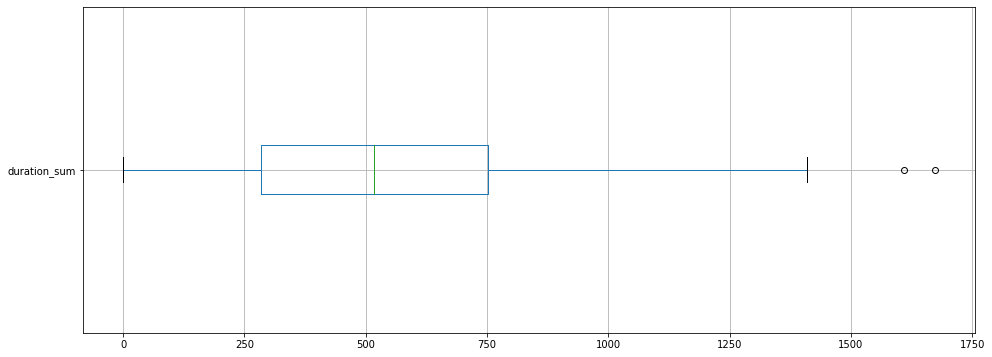

In [63]:
ultra.boxplot(['duration_sum'], vert=False, figsize=(16,6))

В парметры функции boxplot можно передать vert=False и figsize=(16,6), тогда его будет намного удобнее изучать

Выбросы есть, сделаем срез до 1 500, чтоб избавиться о них.

In [64]:
ultra = ultra.query('duration_sum < 1500') #делаем срез и сохраняем
ultra['duration_sum'].describe() #выводим на экран

count     983.000000
mean      524.356053
std       313.915038
min         0.000000
25%       283.000000
50%       518.000000
75%       751.000000
max      1410.000000
Name: duration_sum, dtype: float64

In [65]:
np.var(ultra['duration_sum'], ddof=1)

98542.65110130882

Для пользователей тарифа Ультра в месяц в среднем требуется 529,49 минуты, что составляет 8,8 часов. При этом среднее отклонение составляет 316,55 минут (5,28 часов), а дисперсия 100 206.

Аналогичные действия проведем для столбца duration_sum таблицы smart:

In [66]:
smart['duration_sum'].describe()

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: duration_sum, dtype: float64

<AxesSubplot:>

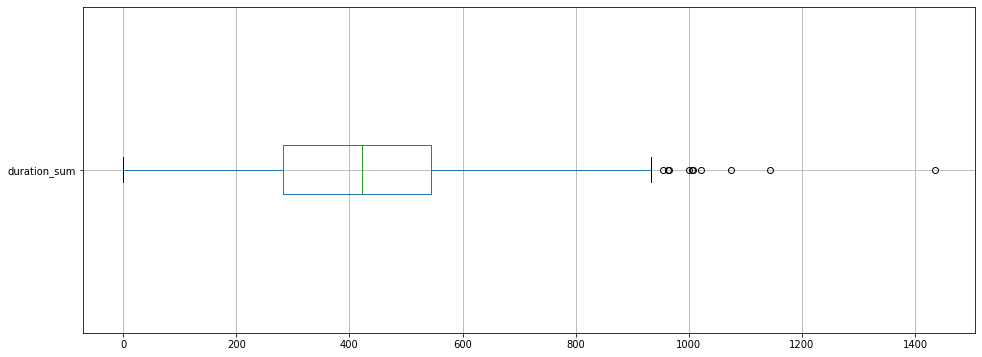

In [67]:
smart.boxplot(['duration_sum'], vert=False, figsize=(16,6)) #строим диаграмму

Можно сразу заметить, что здесь больше выбивающихся значений, удалим все, что больше 950 минут.

In [68]:
smart = smart.query('duration_sum < 950') #делаем срез и сохраняем
smart['duration_sum'].describe() #проверка

count    2219.00000
mean      415.05498
std       185.60219
min         0.00000
25%       282.00000
50%       421.00000
75%       544.00000
max       933.00000
Name: duration_sum, dtype: float64

In [69]:
np.var(smart['duration_sum'], ddof=1)

34448.17280995225

Потльзователи тарифа "Смарт" в месяц в среднем тратят 419,76 минут (7 часов), среднее отклонение составляет 186,35 мин (3,1 часа). Дисперсия равна 34 725.

Построим гистограмму:

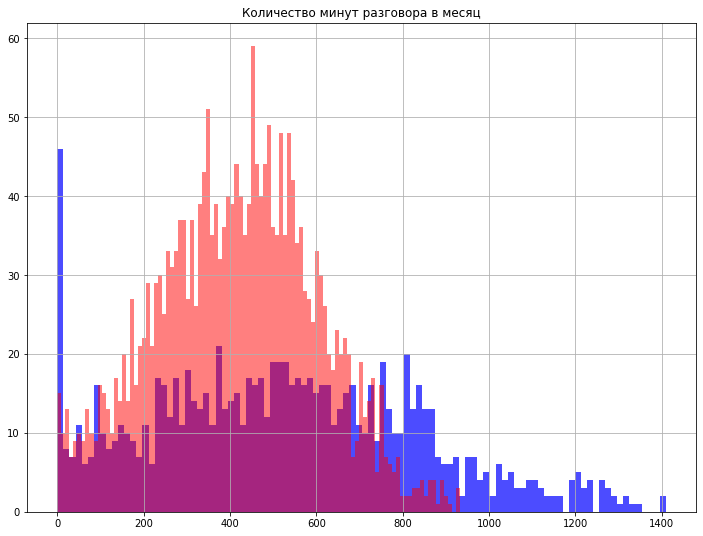

In [70]:
plt.figure(figsize=(12, 9))
plt.hist(ultra['duration_sum'], bins=100, alpha=0.7, color='blue', label='ultra') 
plt.hist(smart['duration_sum'], bins=100, alpha=0.5, color='red', label='smart')
plt.title('Количество минут разговора в месяц')
plt.grid(True)
plt.show()

График пользователей тарифа "Смарта" максимально похож на нормальное распределение: пик на значении около 450 минут, кто-то разговаривает меньше, кто-то больше, но их уже не так много. График пользователей тарифа "Ультра"отличается, пик находится на 0, то есть большая часть клиентов выбирает этот тариф не ради пакета минут на звонки. Также можно отметить, что остальные значения не выбиваются: есть  пики на 240, 380, 500, 750, 810, только после 890 наблюдается спад. Можно сделать вывод, что пользователи Ультры не отличаются бОльшим желанием разговаривать: примерно одинаковое количество пользлвателей разговаривает 220 минут и 650 минут, но большая часть минуты не тратит. Значения дисперсии подтвердает график: дисперсия столбца duration_sum таблицы ultra значительно больше, чем таблицы smart, то есть для пользователей ultra характерен больший разброс данных о продолжительностях звонков.

### Сообщения

Такие же операции проведем для столбца sms_count для таблицы ultra и smart.

In [71]:
ultra['sms_count'].describe()

count    983.000000
mean      49.403866
std       47.842778
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: sms_count, dtype: float64

<AxesSubplot:>

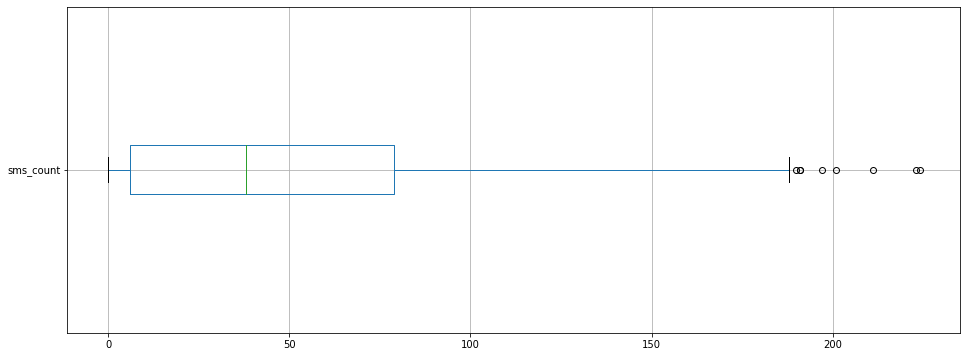

In [72]:
ultra.boxplot(['sms_count'], vert=False, figsize=(16,6)) #строим диаграмму

Примем верхнюю границу в 180 и продолжаем работать с таблицей, удовлетворяющими условию:

In [73]:
ultra = ultra.query('sms_count < 180') #делаем срез и сохраняем
ultra['sms_count'].describe() #проверка

count    969.000000
mean      47.303406
std       44.821648
min        0.000000
25%        6.000000
50%       37.000000
75%       76.000000
max      178.000000
Name: sms_count, dtype: float64

In [74]:
np.var(ultra['sms_count'], ddof=1)

2008.9801640099276

В среднем клиенты, использующие тариф "Ультра", отправляют 49 сообщений, при этом среднее отклонение составляет 45 сообщений, это очень высокое значение. Дисперсия равна 2 046.

Рассмотри чилосвое описание столбца sms_count таблицы smart:

In [75]:
smart['sms_count'].describe()

count    2219.000000
mean       33.363227
std        28.249287
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: sms_count, dtype: float64

Проверим, есть ли выбросы:

<AxesSubplot:>

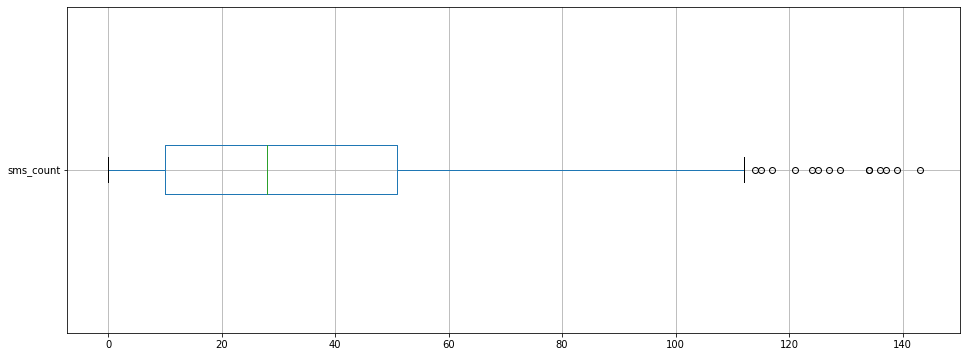

In [76]:
smart.boxplot(['sms_count'], vert=False, figsize=(16,6)) #строим диаграмму

Удалим значения выше отметки 130:

In [77]:
smart = smart.query('sms_count < 130') #делаем срез и сохраняем
smart['sms_count'].describe() #проверка

count    2213.000000
mean       33.081789
std        27.764251
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       129.000000
Name: sms_count, dtype: float64

In [78]:
np.var(smart['sms_count'], ddof=1)

770.8536148796892

ПОльзователи "Смарта" отправляют в среднем 33 сообщения, среднее отклонение при этом равно 27,96, а дисперсия - 781,72.

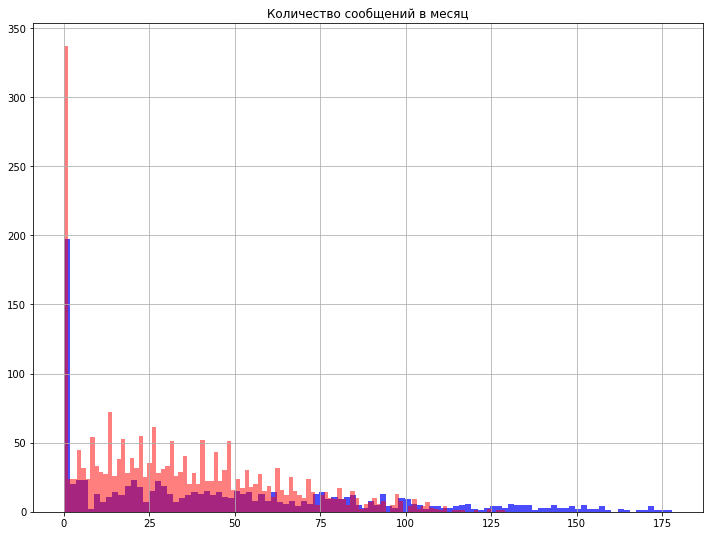

In [79]:
plt.figure(figsize=(12, 9))
plt.hist(ultra['sms_count'], bins=100, alpha=0.7, color='blue', label='ultra') 
plt.hist(smart['sms_count'], bins=100, alpha=0.5, color='red', label='smart')
plt.title('Количество сообщений в месяц')
plt.grid(True)
plt.show()

Пик значений на 0 как у пользователей Смарта, так и Ультры. Основная часть пользователей Смарта, что все-таки отправляют сообщения, обычно отправляю не более 50 шт в месяц, больше 100 - единицы. Остальная часть Ультры использует до 100 сообщений в месяц, при этом показатели сравниваются с пользователяит Смарта в промежутке от 75 до 100 сообщений, не смотря на то, что клиентов с тарифом "Ультра" значительно меньше. 
График также подтверждает бОльшее значение дисперсии тарифа Ультра, то есть разброс данный больше, чем для тарифа Смарт

### Интернет-трафик

Аналогично рассчитаем показатели для интернет-трафика:

In [80]:
ultra['sum_gb_used'].describe()

count    969.000000
mean      19.380805
std        9.807996
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: sum_gb_used, dtype: float64

<AxesSubplot:>

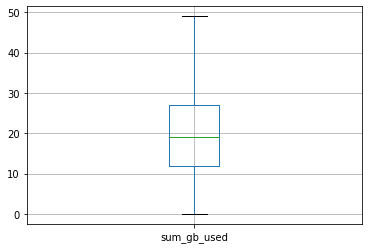

In [81]:
ultra.boxplot(['sum_gb_used']) #строим диаграмму

Выбросов нет, рассчитаем дисперсию:

В среднем, пользователи тарифа "Ультра" используют 19,5 ГБ интернет-трафика, медианное значение практически такое же - 19 ГБ, среднее отклонение равно 9,7 ГБ, дисперсия - 94,06.

In [82]:
smart['sum_gb_used'].describe()

count    2213.000000
mean       16.281970
std         5.719958
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        37.000000
Name: sum_gb_used, dtype: float64

<AxesSubplot:>

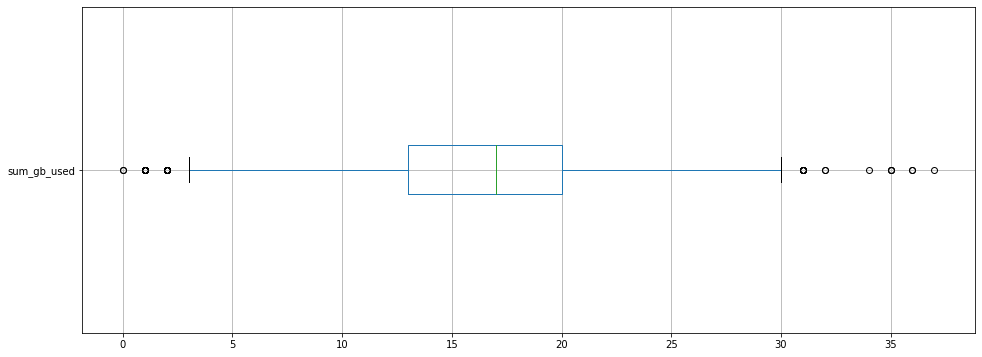

In [83]:
smart.boxplot(['sum_gb_used'], vert=False, figsize=(16,6)) #строим диаграмму

Есть несколько пользователей, которые не пользуются интернетом, уберем тех, кто использует менее 3 ГБ и более 30 ГБ:

In [84]:
smart = smart.query('3 < sum_gb_used < 30') #делаем срез и сохраняем
smart['sum_gb_used'].describe() #проверка

count    2132.000000
mean       16.523921
std         5.059467
min         4.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        29.000000
Name: sum_gb_used, dtype: float64

In [85]:
np.var(smart['sum_gb_used'], ddof=1)

25.598207423163643

Среднее значение пользователей тарифа "Смарт" меньше - 16,57 ГБ, но и значительно меньше среднее отклонение - 5,01 ГБ. Дисперсия равна 25,12. 

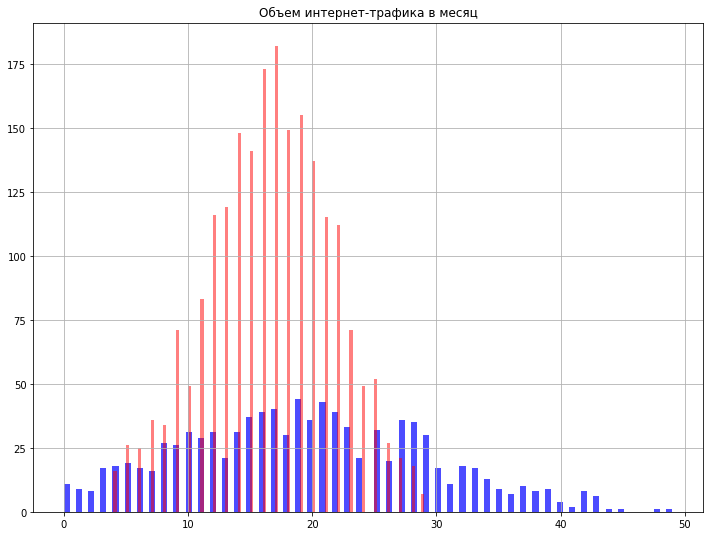

In [86]:
plt.figure(figsize=(12, 9))
plt.hist(ultra['sum_gb_used'], bins=100, alpha=0.7, color='blue', label='ultra') 
plt.hist(smart['sum_gb_used'], bins=100, alpha=0.5, color='red', label='smart')
plt.title('Объем интернет-трафика в месяц')
plt.grid(True)
plt.show()

График аналогичен с предыдущими. Пик для пользователей тарифа "Смарт" - 17 ГБ, распределение графика нормальное. Для пользователей "Ультры" пик - 19ГБ, но он не так выделяется, соседние значения не намного ниже, график получился растянутый. Это же подверждает значение дисперсии 94 > 25, то есть данные пользователей "Ультры" более разбросаны.

**Вывод**

Чтобы определить сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц, мы рассчитали среднее количество, дисперсию и стандартное отклонение, построили гистограммы и на основе имеющихся данных сделали следующие выводы:

Пользователи тарифа "Смарт" в среднем  используют 420 минут разговора в месяц, то есть больше половине клиентов хватает установленного лимита 500 минут, но в то же время, достаточно большая часть пользователей не укладывается в этот пакет. Среднее отклонение 186 минут это подтверждает. То есть, мы бы рекомендовали увеличить тарифный пакет до 600 минут разговора. 
Среднее количество сообщений в месяц, которые отправляют пользователи "Смарта", равно 33. Но по графику было видно, что огромная часть клиентов не используют сообщения как средство связи, а 75% всех пользователей хватает 50 сообщений.
В тарифный план "Смарт" входит 15 Гб интернет-трафика, при этом в среднем, пользователь использует 16,7 Гб, нужно срочно увеличивать пакет, установленный лимит подходит меньше половины клиентов.

Не все пользователи тарифа "Ультра" выбрали этот тариф из-за 3000 минут разговора, часть клиентов совсем не общается по по телефону, среднее значение  составляет  530 минут, а максимальное - 1 410. То есть никто не разговаривает 3 000 минут, пакет нужно уменьшить хотя бы до 1 400.
Аналогичная ситуация с сообщениями, максимальное значение - 178 в месяц; 1 000 сообщений, включенных в пакет никому не нужны, нужно уменьшить.
В среднем, пользователь "Ультры" использует 19,5 Гб, в больше 75% случаях хватает 30 Гб интернет-трафика.

## Шаг 4. Проверка гипотез и пояснения

Нам необходимо выяснить различается ли средняя выручка пользователей тарифов «Ультра» и «Смарт», а так же, отличается ли выручка от пользователей из Москвы от выручки пользователей из других регионов.

Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства, поэтому:

* ***Нулевая гипотеза***: средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковая.

* ***Альтернативная гипотеза***: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам используем метод scipy.stats.ttest_ind (array1, array2,equal_var). Чтобы выяснить какое значение указать параметру equal_var, нужно рассчитать дисперсии обоих столбцов.

In [87]:
np.var(ultra['income'], ddof=1)

138981.57446971827

In [88]:
np.var(smart['income'], ddof=1)

541703.4973988025

Дисперсии не равны, значит equal_var присваиваем значение False.

In [89]:
alpha = .05
results = st.ttest_ind(ultra['income'], smart['income'], equal_var = False)
'p-значение:', results.pvalue

('p-значение:', 1.2665588149731196e-284)

In [90]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Отвергаем нулевую гипотезу


Поскольку нулевая гипотеза была отвергнута, принимаем альтернативную: ***средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются***.

Так как мы работаем с небольшой выборкой, мы можем рассчитать средние показатели выручки и сравнить их, воспользуемся методом describe():

In [91]:
ultra['income'].describe()

count     969.000000
mean     2066.718266
std       372.802326
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: income, dtype: float64

In [92]:
smart['income'].describe()

count    2132.000000
mean     1264.469043
std       736.005093
min       550.000000
25%       573.250000
50%      1045.500000
75%      1750.000000
max      4427.000000
Name: income, dtype: float64

Средняя выручка в месяц от пользователей тарифа "Ультра" составляет - 2 063 руб, когда для пользователей "Смарт" только 644 руб и это при том, что клиенты "Смарт" куда чаще преодолевают лимит, установленный тарифным планом. Это же подтверждает значение стандартного отклонения: не смотря на значительную разницу в средних значениях у обоих тарифов, стандартное отклонение у "Ультры" ниже.

Рассчитаем общую выручку:

In [93]:
print('Выручка от пользователей тарифа "Ультра" составляет', 
        (sum(ultra['income'])*100/(sum(ultra['income'])+sum(smart['income']))), '% от общей выручки.')


Выручка от пользователей тарифа "Ультра" составляет 42.62319575319602 % от общей выручки.


In [94]:
print('Выручка от пользователей тарифа "Смарт" составляет', 
        (sum(smart['income'])*100/(sum(ultra['income'])+sum(smart['income']))), '% от общей выручки.')

Выручка от пользователей тарифа "Смарт" составляет 57.37680424680398 % от общей выручки.


Мы выяснили, что не зависимо от того, что клиентов "Ультры" меньше, их общая выручка все равно превышает "Смарт":

Для сравнения помесячной выручки построим диаграмму дохода по месяцам:

<AxesSubplot:title={'center':'Тариф "Смарт"'}, xlabel='month'>

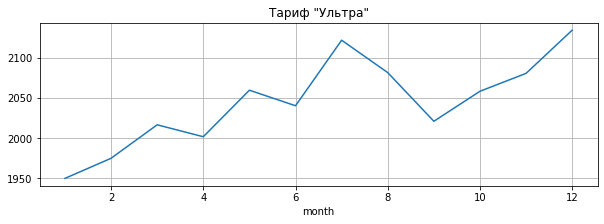

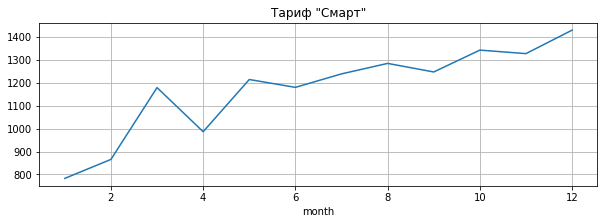

In [95]:
ultra.groupby(['month'] ).agg({'income': ['mean']}).plot(grid=True, figsize=(10, 3), title= 'Тариф "Ультра"', legend=False)
smart.groupby(['month'] ).agg({'income': ['mean']}).plot(grid=True, figsize=(10, 3), title= 'Тариф "Смарт"', legend=False)

На диаграмме мы убеждаемся, что тариф "Ультра" приносит куда больше выручки из месяца в месяц. 

Проверим еще одну гипотезу:

**Нулевая гипотеза**: средняя выручка пользователи из Москвы и из других регионов одинаковы.

**Альтернативная гипотеза**: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Для этого объединим 2 таблицы ultra и smart:

In [96]:
df=ultra.append(smart)
df #проверим

,user_id,month,calls_count,duration_sum,sms_count,sum_mb_used,sum_gb_used,tariff,city,above_limit,income
0,1000,5,22.0,159.0,22.0,2253.49,3.0,ultra,Краснодар,0.0,1950.0
1,1000,6,43.0,172.0,60.0,23233.77,23.0,ultra,Краснодар,0.0,1950.0
2,1000,7,47.0,340.0,75.0,14003.64,14.0,ultra,Краснодар,0.0,1950.0
3,1000,8,52.0,408.0,81.0,14055.93,14.0,ultra,Краснодар,0.0,1950.0
4,1000,9,58.0,466.0,57.0,14568.91,15.0,ultra,Краснодар,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...
2224,1489,8,0.0,0.0,17.0,11050.56,11.0,smart,Санкт-Петербург,0.0,550.0
2225,1489,9,0.0,0.0,32.0,17206.30,17.0,smart,Санкт-Петербург,400.0,950.0
2226,1489,10,0.0,0.0,21.0,19559.44,20.0,smart,Санкт-Петербург,1000.0,1550.0
2227,1489,11,0.0,0.0,20.0,17491.56,18.0,smart,Санкт-Петербург,600.0,1150.0


Сделаем срез по городу. В df_msk будут храниться данные о пользователях из города Москва, в  df_regions - остальные.

In [97]:
df_msk = df.query('city == "Москва"')
len(df_msk)

597

In [98]:
df_regions = df.query('city != "Москва"')
len(df_regions)

2504

Рассчитаем дисперсии:

In [99]:
np.var(df_msk['income'], ddof=1)

520730.76943442045

In [100]:
np.var(df_regions['income'], ddof=1)

561932.2959794891

Значения не равны, значит equal_var присваиваем значение False.

In [101]:
alpha = .05
results = st.ttest_ind(df_msk['income'], df_regions['income'], equal_var = False)
'p-значение:', results.pvalue

('p-значение:', 0.21734318657643145)

In [102]:
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Не получилось отвергнуть нулевую гипотезу


Поскольку нулевую гипотезу не получилось отвергнуть, принимаем ее: ***средняя выручка пользователи из Москвы и из других регионов одинаковы.***.

Посмотрим на диаграмме сколько приносят пользователи из Москвы и из регионов:

<AxesSubplot:title={'center':'Регионы'}, xlabel='month'>

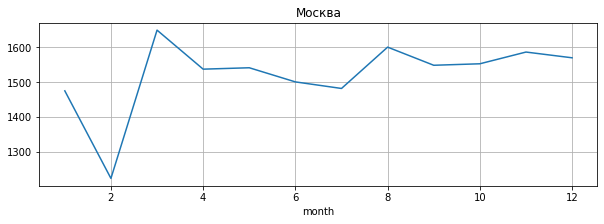

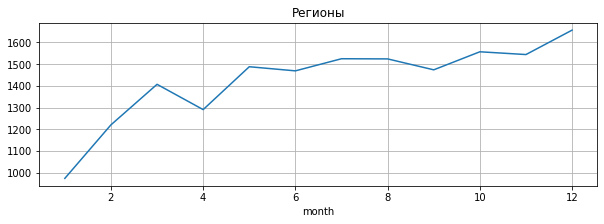

In [103]:
df_msk.groupby(['month'] ).agg({'income': ['mean']}).plot(grid=True, figsize=(10, 3), title= 'Москва', legend=False)
df_regions.groupby(['month'] ).agg({'income': ['mean']}).plot(grid=True, figsize=(10, 3), title= 'Регионы', legend=False)

На графике можно проследить, что выручка от пользователей Москвы и регионов не сильно отличается: в январе приносят доход Москва, а феврале больше регионы; в марте Москва приносит столько же, сколько регионы в декабре. С апреля доход у всех не падает ниже 1450.
Рассчитаем сколько пользователей тарифа "Ультры" в Москве и регионах:

In [104]:
print(int(len(df_msk.query('tariff == "ultra"'))/len(df_msk)*100), '% пользователей в Москве подключены к тарифу "Ультра" из всех московских клиентов "Мегалайна".')


37 % пользователей в Москве подключены к тарифу "Ультра" из всех московских клиентов "Мегалайна".


In [105]:
print(int(len(df_regions.query('tariff == "ultra"'))/len(df_regions)*100), '% пользователей в остальных регионах подключены к тарифу "Ультра" из всех клиентов регионов "Мегалайна".')


29 % пользователей в остальных регионах подключены к тарифу "Ультра" из всех клиентов регионов "Мегалайна".


В Москве на 8% пользователей "Ультры" больше. Расчитаем средний доход выручки от пользователей из Москвы и из регионов:

In [106]:
df_msk['income'].describe()

count     597.000000
mean     1548.165829
std       721.616775
min       550.000000
25%       826.000000
50%      1777.000000
75%      1950.000000
max      4050.000000
Name: income, dtype: float64

In [107]:
df_regions['income'].describe()

count    2504.000000
mean     1507.285543
std       749.621435
min       550.000000
25%       750.000000
50%      1585.000000
75%      1950.000000
max      4800.000000
Name: income, dtype: float64

Если мы вычтем 8% разницы из средней выручки от московских пользователей:

In [108]:
1548.165829-0.08*1507.285543

1427.58298556

Получилось 1549. То есть, можем сделать вывод, что московские пользователи не тратят примерно также, а если учесть, что среди них больше пользователей тарифа "Ультра", то они тратят даже меньше регионов.

**Вывод**

 Используя метод scipy.stats.ttest_ind (array1, array2,equal_var) и рассчитав дисперсии мы проверили две гипотезы и выснили, что:
 
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Также проведя расчеты и построя линейные диаграммы мы обнаружили, что как средняя, так и общая за 2018 год, выручка от пользователей "Ультра" значительно выше, чем от "Смарт". Кроме того, мы выяснили, что пользователи из Москвы чаще пользуются тарифом "Ультра", чем жители других регионов, при этом средняя выручка пользователей из Москвы и из регионов одинаковая.

## Общий вывод

Мы ознакомились с данными, которые хранятся в пяти таблицах: users, calls, messages, internet и tariffs. 

В users, calls, messages, internet поменяли тип данных в столбцах, где это было необходимо, добавили новые столбцы, необходимые для анализа. Нашли закономерность, что с января каждый месяц количество сообщений, звонков и интернет -трафика значительно увеличивается и в декабре достигает пика, при этом количество клиентов в течении года расчет не так сильно. Также обнаружили, что среди клиентов много пенсионеров: в тройку лидеров численности по возрастам пользователей входят 71-летние.

Для каждого пользователя мы рассчитали:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

Мы сделали предварительный анализ тарифов на небольшой выборке клиентов и заметили, что пользователям с тарифом "Ультра" обычно хватает пакета, установленного тарифным планом стоиомостью 1950 руб: 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика. Только в 13,6% случаях 30Гб интернета не достаточно и клиенты доплачивают 150 руб за дополнительный 1Гб.
Пользователям же тарифа "Смарт" часто не хватает оплаченного тарифного пакета стоимостью 550 руб: 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика. 35% случаев, когда клиентам не хватает звонков, 26%- сообщений, 59% - трафика. При этом за потребление сверх пакета клиенты данного тарифа вынуждены доплачивать по большей стоимости (3 рубля за минуту сообщения, сообщение и 200 руб за 1 ГБ интернета), чем это делали бы пользователи "Ультры".

Чтобы определить сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц, мы рассчитали среднее количество, дисперсию и стандартное отклонение, построили гистограммы и на основе имеющихся данных сделали следующие выводы:

1. Пользователи тарифа "Смарт" в среднем используют 420 минут разговора в месяц, то есть больше половине клиентов хватает установленного лимита 500 минут, но в то же время, достаточно большая часть пользователей не укладывается в этот пакет. Среднее отклонение 186 минут это подтверждает. Мы бы рекомендовали увеличить тарифный пакет до 600 минут разговора. 
2. Среднее количество сообщений в месяц, которые отправляют пользователи "Смарта", равно 33. Но по графику было видно, что огромная часть клиентов не используют сообщения как средство связи, а 75% всех пользователей хватает 50 сообщений. 
3. В тарифный план "Смарт" входит 15 Гб интернет-трафика, при этом в среднем, пользователь использует 16,7 Гб, нужно срочно увеличивать пакет, установленный лимит подходит меньше половины клиентов.
1. Не все пользователи тарифа "Ультра" выбрали этот тариф из-за 3000 минут разговора, часть клиентов совсем не общается по телефону, среднее значение составляет 530 минут, а максимальное - 1 410. То есть никто не разговаривает 3 000 минут, пакет нужно уменьшить хотя бы до 1 400. 
2. Аналогичная ситуация с сообщениями, максимальное значение - 178 в месяц; 1 000 сообщений, включенных в пакет никому не нужны, нужно уменьшить. 
3. В среднем, пользователь "Ультры" использует 19,5 Гб, в больше 75% случаях хватает 30 Гб интернет-трафика.

Также мы проверили две гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются; 
- средняя выручка пользователи из Москвы отличается от выручки пользователей из других регионов.

Гипотезы подтвердились. Проведя расчеты  мы обнаружили, что средняя и общая выручка за 2018 год от пользователей "Ультра" значительно выше, чем от "Смарт": Выручка от пользователей тарифа "Ультра" составила почти 59 % от общей выручки, хотя пользователей меньше почти в 3 раза.

Кроме того, мы выяснили, что пользователи из Москвы чаще пользуются тарифом "Ультра", чем жители других регионов, при этом средняя выручка пользователей из Москвы и из регионов одинаковая.

Можно сделать вывод, что тариф "Ультра" лучше для компании «Мегалайн», поскольку пользователи тарифа приносят большую прибыль, чем пользователи тарифа "Смарт". Кроме того, большинство клиентов не тратят весь установленный тарифный пакет, что подверждает его действенность.